**Tema 4 - P7, seccion 1. Enunciado**
------------------------------------------------------------------------------
***

<img src="viga.png" width="400">

Problema 7



Nota para el criterio de signos: Todas las reacciones y solicitaciones se consideran positivos en dirección positiva de los ejes cartesianos.

**Resolución:**
------------------------------------------------------------------------------

**Cálculo del diagrama de esfuerzos**

Vamos a obtener primero las expresiones de los esfuerzos.

In [9]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas


x=symbols('x') #variable simbólica coordenada x
R0y,R1y=symbols('R0y R1y')
M0z,M1z=symbols('M0z M1z')

A1,B1=symbols('A1 B1')
E,I,r=symbols('E I r')

T0=0.0 #Nm  el par en x=0

#carga puntual
P=-400.0 #N

#r=0.04

#cargas distribuidas (positivas en sentido +y)
rho=7850.0 #kg/m3
qq01=-9.81*rho*math.pi*r**2 #N/m la carga distribuida entre los puntos 0 y 1 (entre x=0 y x=L1)

#geometría
L1=0.450 #m
L=L1 #longitud total

#material
E=1.0e4
I=2.0e1

#Cálculo estático. Añadir las ecuaciones ΣFy=0 y ΣMz=0 en la primera y segunda linea. Las reacciones que no participen
#en las ecuaciones (R0y,R1y,M0z,M1z) hay que añadirlas en las lineas de abajo
#Nota: Todas las reacciones y solicitaciones se consideran positivos en dirección positiva de los ejes cartesianos.
sol,=linsolve([  R0y+qq01*L+P,   #se pone todo positivo siempre
               P*L+qq01*L*L/2.0+M0z,
              M1z,
              R1y
             ], (R0y,R1y,M0z,M1z))

#reacciones
R0y=sol[0] #N reacción en y en x=0 
R1y=sol[1] #N reacción en y en x=L1 
M0z=sol[2] #Nm reacción momento en x=0 
M1z=sol[3] #Nm reacción momento en x=L1 


#-------------------------------------------------------------------------------------#
#------------------------------------- CÁLCULO  --------------------------------------#
#-------------------------------------------------------------------------------------#

#Definimos la carga distribuida
def q1(x):        
    return  qq01

#Definimos el cortante
VL=R0y #Este es el valor del cortante a la izquierda del tramo 1, lo que llamamos V+(x=0)
def cortante1(x):        
    return  integrate(q1(x), (x, 0, x)) + VL #esto quiere decir que integramos q(x) dandole a x limites entre 0 y x. 

#Definimos el flector
ML=-M0z-T0 #Este es el valor del flector a la izquierda del tramo 1, lo que llamamos M+(x=0)
def flector1(x):        
    return  integrate(cortante1(x), (x, 0, x)) + ML #en MPa 

V1=cortante1(x) 
M1=flector1(x)

print("ML es: ", ML)
print("La expresión del cortante en el tramo 1 es: ", V1)
print("La expresión del flector en el tramo 1 es: ", M1)


Mmax=M1.subs([(x,0.0)])
print("Mmax es: ", Mmax)

sigmaMA=60000000 #N/m2
Wz=math.pi*r**3/4.0

print(-Mmax-sigmaMA*Wz)

sole=solve([-Mmax-sigmaMA*Wz], r)
tmp=sole[0]

print("El diametro requerido es: ", tmp[0]*2.0)
#Tsol=sole[0]
#print("T0=", Tsol)

r0=tmp[0]


ML es:  -24495.3454587269*r**2 - 180.0
La expresión del cortante en el tramo 1 es:  -241929.33786397*r**2*x + 108868.202038786*r**2 + 400.0
La expresión del flector en el tramo 1 es:  -120964.668931985*r**2*x**2 - 24495.3454587269*r**2 + x*(108868.202038786*r**2 + 400.0) - 180.0
Mmax es:  -24495.3454587269*r**2 - 180.0
-47123889.8038469*r**3 + 24495.3454587269*r**2 + 180.0
El diametro requerido es:  0.0316141134584652


**Cálculo de la deflexión**

Para ello utilizaremos el método de la doble integración. Realizaremos las integrales analíticamente e impondremos las condiciones de contorno correspondientes para obtener las constantes de integración (para ello usaremos la función *linsolve*).

In [7]:
#-------------------------------------------------------------------------------------#
#----------------------------- MÉTODO DOBLE INTEGRACIÓN ------------------------------#
#-------------------------------------------------------------------------------------#  

def giro1(x,A1):        
    return  integrate(flector1(x)/(E*I),x) + A1 #en MPa

def deflexion1(x,A1,B1):        
    return  integrate(giro1(x,A1),x) + B1 #en MPa

G1=giro1(x,A1) 
U1=deflexion1(x,A1,B1)
print("La expresión del giro en el tramo 1 es: ", G1)
print("La expresión de la deflexion en el tramo 1 es: ", U1)
print("")

#-------------------------------------------------------------------------------------#
#----------------------------------- C.C. ELÁSTICA -----------------------------------#
#-------------------------------------------------------------------------------------#    
  
G1_0=G1.subs([(x,0)])    #giro en tramo 1, punto 0
G1_1=G1.subs([(x,L1)])   #giro en tramo 1, punto 1


U1_0=U1.subs([(x,0)])    #deflexion en tramo 1, punto 0
U1_1=U1.subs([(x,L1)])   #deflexion en tramo 1, punto 1
 
    
sole,=linsolve([  U1_0,      #deflexion en tramo1, punto 0 es nula (apoyo)
                  G1_0       #giro en tramo1, punto 0 es nulo (apoyo)
             ], (A1,B1))


G1_exp=G1.subs([(A1,sole[0])])
U1_exp=U1.subs([(A1,sole[0]),(B1,sole[1])])
print("Aplicadas las condiciones de contorno...")
print("La expresión del giro en el tramo 1 es: ", G1_exp)
print("La expresión de la deflexion en el tramo 1 es: ", U1_exp)
print("")

#T0 tal que la deflexion sea >0 en algun punto y/o empotramiento en A:
G_A=G1_exp.subs([(x,0.0)])
print("El giro en x=0 es: ", G_A)

#sole,=linsolve([  G_A,
#             ], (T0))

#Tsol=sole[0]
#print("T0=", Tsol)




La expresión del giro en el tramo 1 es:  A1 - 0.201607781553308*r**2*x**3 + x**2*(0.272170505096966*r**2 + 0.001) + x*(-0.122476727293635*r**2 - 0.0009)
La expresión de la deflexion en el tramo 1 es:  1.0*A1*x + B1 - 0.050401945388327*r**2*x**4 + x**3*(0.0907235016989886*r**2 + 0.000333333333333333) + x**2*(-0.0612383636468173*r**2 - 0.00045)

Aplicadas las condiciones de contorno...
La expresión del giro en el tramo 1 es:  -0.201607781553308*r**2*x**3 + x**2*(0.272170505096966*r**2 + 0.001) + x*(-0.122476727293635*r**2 - 0.0009)
La expresión de la deflexion en el tramo 1 es:  -0.050401945388327*r**2*x**4 + x**3*(0.0907235016989886*r**2 + 0.000333333333333333) + x**2*(-0.0612383636468173*r**2 - 0.00045)

El giro en x=0 es:  0


**Representación gráfica**

 
El maximo cortante es:  [427.20214019] N
El maximo flector  es:  [186.12048154] Nm
La máxima deflexión es:  [6.22992469e-05] m


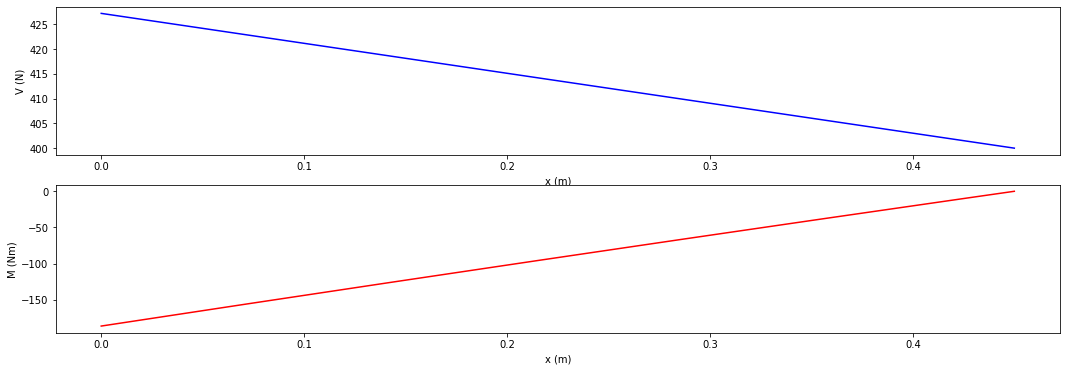

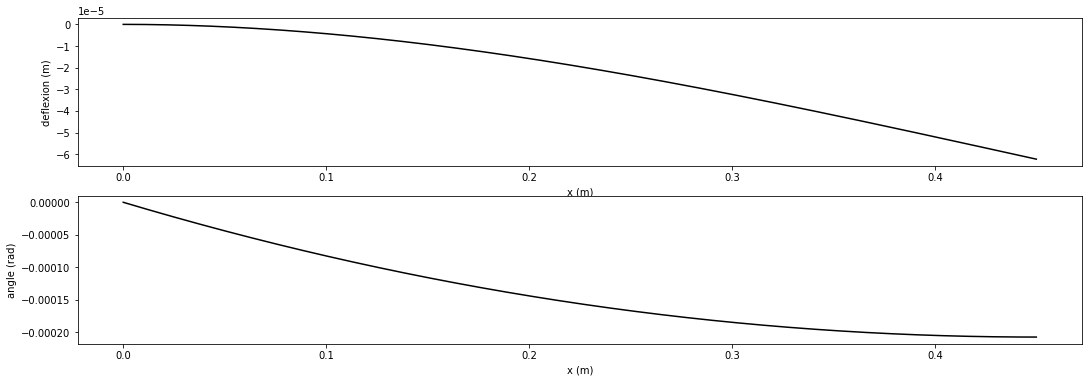

In [8]:
Xmin= 0 ; Xmax=L; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)\n",
xx=np.zeros((nopto,1))
vv=np.zeros((nopto,1))
mm=np.zeros((nopto,1))
uu=np.zeros((nopto,1))
aa=np.zeros((nopto,1))


for i in range(0,nopto): 
    xp = Xmin+i*(Xmax-Xmin)/(nopto-1) 
    xx[i]=xp
    vv[i]=V1.subs([(x,xp),(r,r0)])
    mm[i]=M1.subs([(x,xp),(r,r0)])
    uu[i]=U1_exp.subs([(x,xp),(r,r0)])
    aa[i]=G1_exp.subs([(x,xp),(r,r0)])

        
filename="Nombre de la función"
fig, (ax,ax2) = plt.subplots(2,1,figsize=(18, 6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                          # Se genera un objeto figura que definimos a continuación

ax.plot(xx,vv, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.set_xlabel("x (m)") # Nombre y unidades del eje x
ax.set_ylabel("V (N)") # Nombre y unidades del eje y

ax2.plot(xx,mm, color="red") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.set_xlabel("x (m)") # Nombre y unidades del eje x
ax2.set_ylabel("M (Nm)") # Nombre y unidades del eje y

fig2, (ax3,ax4) = plt.subplots(2,1,figsize=(18, 6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                          # Se genera un objeto figura que definimos a continuación

ax3.plot(xx,uu, color="black") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax3.set_xlabel("x (m)") # Nombre y unidades del eje x
ax3.set_ylabel("deflexion (m)") # Nombre y unidades del eje y

ax4.plot(xx,aa, color="black") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax4.set_xlabel("x (m)") # Nombre y unidades del eje x
ax4.set_ylabel("angle (rad)") # Nombre y unidades del eje y

print(" ")
print("El maximo cortante es: ", max(abs(vv)),"N")
print("El maximo flector  es: ", max(abs(mm)),"Nm")
print("La máxima deflexión es: ", max(abs(uu)),"m")